<a href="https://colab.research.google.com/github/infernoYam1n/BlazeData/blob/main/MachineLearning/Feature%20Engineering/FeatureScaling%20-Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Machine Learning
 with Python:  


Feature Scaling - Standardization

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
df=pd.read_csv('Social_Network_Ads.csv')

In [98]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Train Test split

In [99]:
df=df.iloc[:,2:]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),  # features (independent variables)
    df['Purchased'],              # label/output (dependent variable)
    test_size=0.3,                # 30% data for testing, 70% for training
    random_state=0                # ensures reproducibility
)

# x_train and y_train are used to train the model
# x_test and y_test are used to evaluate the model

<small><small>

##### 🔹 **`df.drop('Purchased', axis=1)` মানে কী?**

👉 এটি মূল DataFrame `df` থেকে `'Purchased'` নামে যেই column আছে, সেটাকে বাদ দিয়ে দিচ্ছে।


---

### ❓ **কেন এটা বাদ দিচ্ছে?**
- **`Purchased`** হলো target/label/output — যেটা আমরা predict করতে চাই।
- `x_train` এবং `x_test` এ শুধু input features (independent variables) রাখতে হয়। তাই `Purchased` কে বাদ দেওয়া হয়েছে।

---

### **Variable Content**:
| **Variable** | **Content** |
|--------------|-------------|
| `x_train`    | Training set এর input features |
| `x_test`     | Test set এর input features |
| `y_train`    | Training set এর label/output |
| `y_test`     | Test set এর label/output |

---

### **Key Points**:
- **`df.drop('Purchased', axis=1)`** ➝ Input features তৈরি করছে।
- **`df['Purchased']`** ➝ Target variable তৈরি করছে।
- **`train_test_split`** ➝ Dataset কে training এবং testing sets এ ভাগ করছে।

</small></small>

In [101]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 2), (280,), (120, 2), (120,))

In [102]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

#transform the training and test data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [103]:
scaler.mean_, scaler.var_

(array([3.78642857e+01, 6.98071429e+04]),
 array([1.04038724e+02, 1.19572709e+09]))

<small>
<small>

#### 🔁Extra Info:


fit() ➝ শিখে নেয় কীভাবে scale করতে হবে (mean, std)

transform() ➝ সেই নিয়মে ডেটাকে পরিবর্তন করে

fit_transform() ➝ একসাথে দুটোই করে (training ডেটার জন্য)




##### 🔹 `scaler.fit(x_train)` কী করে?
👉 এটি **training data** থেকে:
- প্রতিটি ফিচারের (column এর) **mean (গড়)** এবং **standard deviation (std বা মান বিচ্যুতি)** বের করে **মনে রাখে**।

❗ **Note:** `fit()` শুধুমাত্র হিসাব করে, এখনো কোনো ডেটাকে পরিবর্তন (scale) করে না।

---

##### 🔹 `scaler.transform(x_train)` কী করে?
👉 এটি প্রতিটি ফিচারের জন্য নিচের ফর্মুলা প্রয়োগ করে:

![image.png](attachment:image.png)

🎯 অর্থাৎ, এটি প্রতিটি ফিচার ভ্যালুকে এমনভাবে পরিবর্তন করে যাতে তার:
- **Mean = 0**
- **Standard Deviation = 1**

---

##### 🔹 তাহলে কেন `transform()` দরকার?
✅ মডেল যেন **biased না হয়** কোন ফিচার বড় বা ছোট স্কেলে থাকার কারণে।

✅ অনেক মেশিন লার্নিং এলগরিদম (যেমনঃ `SVM`, `KNN`, `Logistic Regression`) **স্কেল সেনসিটিভ** — তারা ফিচারের স্কেল অনুযায়ী **ভুল সিদ্ধান্ত** নিতে পারে।

✅ `transform()` না করলে মডেল training করার সময় **বুঝতে পারবে না** কোন ফিচার কতোটা গুরুত্বপূর্ণ।

---





🔍 উদাহরণ:
ধরো, একটা ফিচার হল "Age" (20–60),
আরেকটা ফিচার হল "Salary" (20000–200000)।
এখন "Salary" অনেক বড় সংখ্যায়, তাই মডেল
সেটাকেই বেশি গুরুত্ব দিবে।
স্কেলিং করলে এই পার্থক্যটা দূর হয় — তখন সবকিছু
একই স্কেলে আসে।

</small>
</small>

In [104]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [105]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [106]:
np.round(x_train.describe(), 1)  #before applying the scaler

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [107]:
np.round(x_train_scaled.describe(), 2) #after applying the scaler

#noticed that the mean is now 0 and the standard deviation is 1 for each feature

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


Effect of Scaling

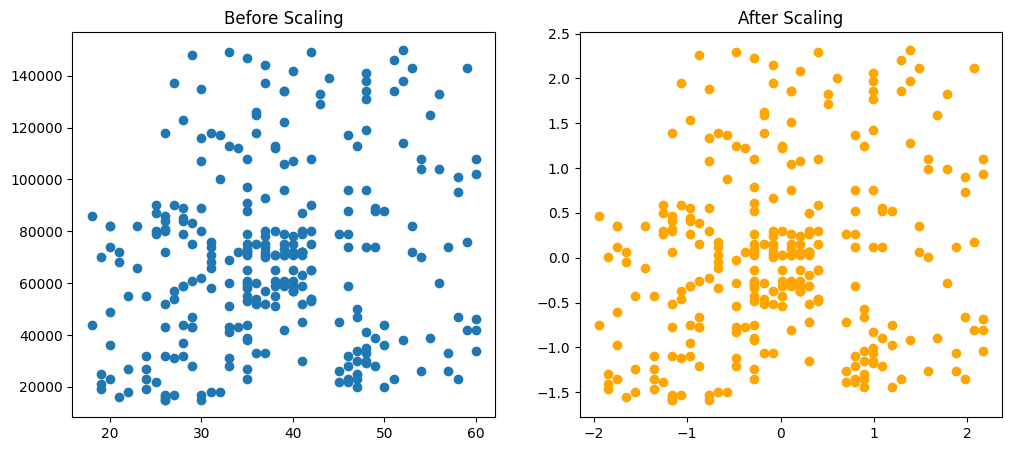

In [108]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scaling
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

#After scaling
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='orange')
ax2.set_title('After Scaling')

plt.show()


# noticed that in 1st plot the data point and 2nd plot data point are
# same but the scale is different i mean you see the x axis and y axis
# in 1st plot is not same as the x axis and y axis in 2nd plot
# This is because the data is scaled to have a mean of 0 and a standard deviation of 1
# data point guloke move kore mulbindur (0,0) er kache niye asa hoi

Text(0.5, 1.0, 'After Scaling')

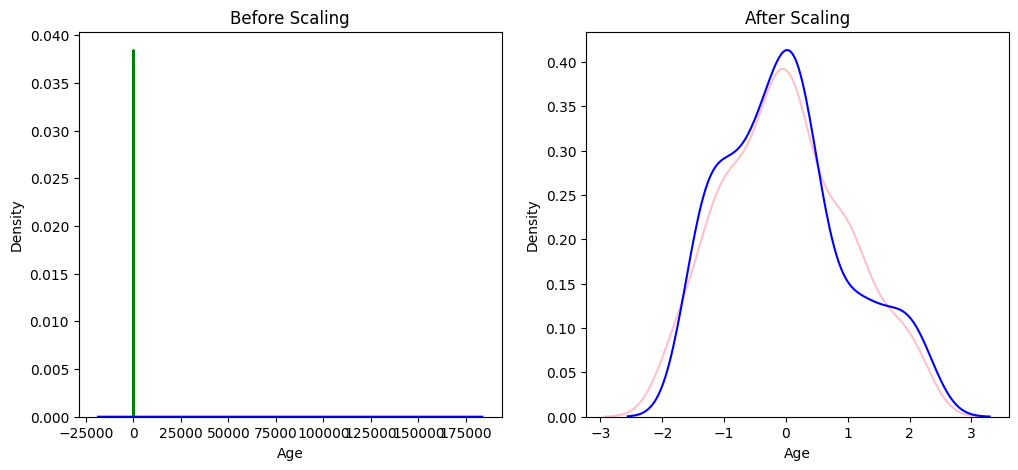

In [109]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
sns.kdeplot(x_train['Age'],ax=ax1, color='green')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1, color='blue')
ax1.set_title('Before Scaling')


# After scaling
sns.kdeplot(x_train_scaled['Age'],ax=ax2, color='pink')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2, color='blue')
ax2.set_title('After Scaling')


Comparison of Distributions

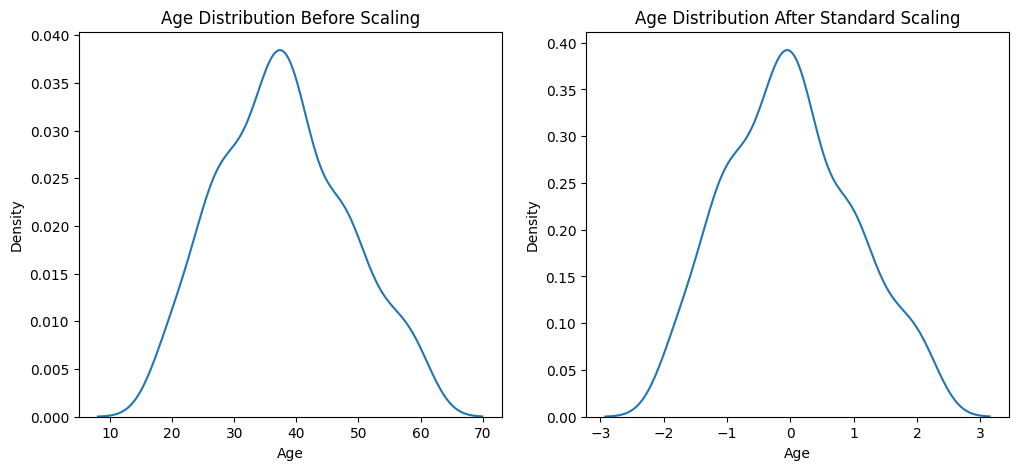

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()


#both are same but the scale is different
# in the first plot the x axis is not same as the second plot x axis

Why scaling is important

Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [112]:
model=LogisticRegression()
model_scaled=LogisticRegression()

In [113]:
model.fit(x_train, y_train)  # training the model on original data
model_scaled.fit(x_train_scaled, y_train)  # training the model on scaled data

LogisticRegression()

In [114]:
# predicting on original data
y_pred=model.predict(x_test)

# predicting on scaled data
y_pred_scaled=model_scaled.predict(x_test_scaled)

In [115]:
print("Accuracy on original data:", accuracy_score(y_test, y_pred))

print("Accuracy on scaled data:", accuracy_score(y_test, y_pred_scaled))

Accuracy on original data: 0.875
Accuracy on scaled data: 0.8666666666666667


In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model=DecisionTreeClassifier()

model_scaled=DecisionTreeClassifier()

In [118]:
model.fit(x_train, y_train)  # training the model on original data

model_scaled.fit(x_train_scaled, y_train)  # training the model on scaled data

DecisionTreeClassifier()

In [119]:
y_pred=model.predict(x_test)  # predicting on original data

y_pred_scaled=model_scaled.predict(x_test_scaled)  # predicting on scaled data

In [120]:
print("Accuracy on original data:", accuracy_score(y_test, y_pred))

print("Accuracy on scaled data:", accuracy_score(y_test, y_pred_scaled))

Accuracy on original data: 0.875
Accuracy on scaled data: 0.8666666666666667


<small><small>

you see there are not change before scaling and after scaling in decision tree...

In tree-based models such as Decision Tree, Random Forest, and XGBoost, feature scaling is not required, as these algorithms are inherently scale-invariant.


ট্রি-ভিত্তিক মডেল যেমন Decision Tree, Random Forest, এবং XGBoost-এর ক্ষেত্রে ফিচার স্কেলিং প্রয়োজন হয় না, কারণ এই অ্যালগোরিদমগুলো প্রাকৃতিকভাবে স্কেল ইনভেরিয়েন্ট অর্থাৎ ভিন্ন স্কেলের ডেটার উপরেও সঠিকভাবে কাজ করতে সক্ষম।

</small></small>



In [121]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of outliers

In [122]:
# amra amader dataset e notun kichu man/value add korbo


# নতুন ডেটা তৈরী
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

# নতুন ডেটা আগের df-এ যুক্ত করা (modern way)
df = pd.concat([df, new_data], ignore_index=True)


In [123]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


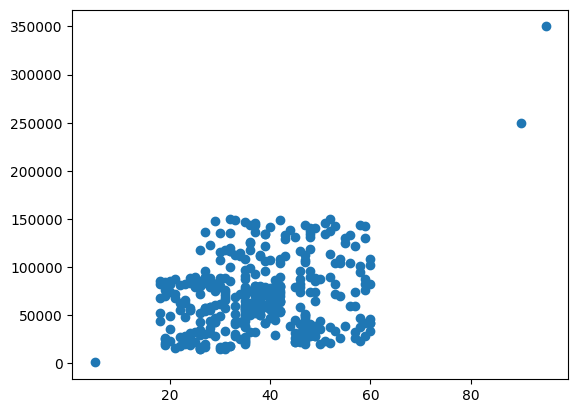

In [124]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [129]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),  # features (independent variables)
    df['Purchased'],              # label/output (dependent variable)
    test_size=0.3,                # 30% data for testing, 70% for training
    random_state=0                # ensures reproducibility
)

x_train.shape, x_test.shape

((282, 2), (121, 2))

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [132]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

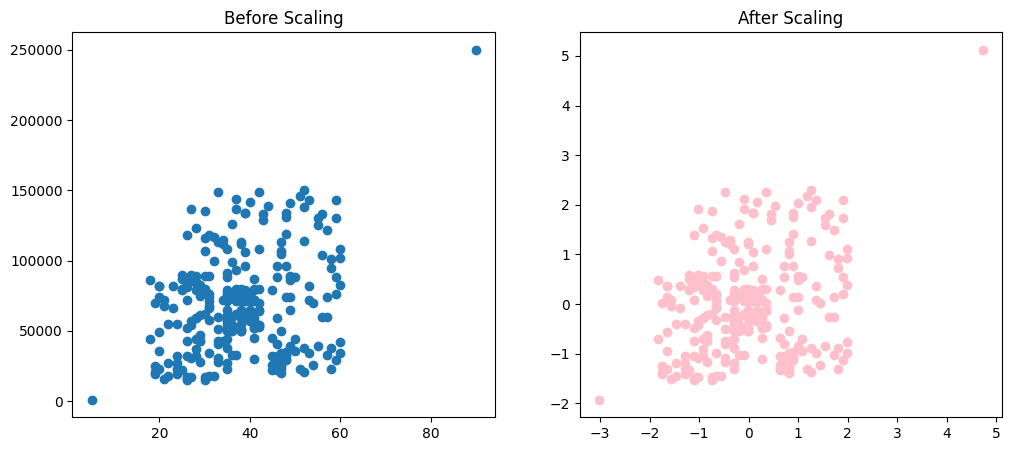

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='pink')
ax2.set_title("After Scaling")
plt.show()